# 항공기 엔진 고장 시점 및 일정 기간내 고장발생 여부 예측

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 데이터

* 훈련데이터
[download trianing data](http://azuremlsamples.azureml.net/templatedata/PM_train.txt)  
* 테스트 데이터
[download test data](http://azuremlsamples.azureml.net/templatedata/PM_test.txt)  
* 정답 데이터
[download truth data](http://azuremlsamples.azureml.net/templatedata/PM_truth.txt)  

[보고서](https://www.dropbox.com/s/9bfvx1d13o5wyqy/Predictive%20Maintenance%20Project%20Report.pdf)

In [0]:
!curl http://azuremlsamples.azureml.net/templatedata/PM_train.txt \
    -o PM_train.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3432k  100 3432k    0     0  13.7M      0 --:--:-- --:--:-- --:--:-- 13.7M


In [0]:
!curl http://azuremlsamples.azureml.net/templatedata/PM_test.txt \
        -o PM_test.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2176k  100 2176k    0     0  20.0M      0 --:--:-- --:--:-- --:--:-- 19.8M


In [0]:
!curl http://azuremlsamples.azureml.net/templatedata/PM_truth.txt \
        -o PM_truth.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   429  100   429    0     0  17160      0 --:--:-- --:--:-- --:--:-- 17160


### Data Columns

•	__id__: is the engine ID, ranging from 1 to 100  
•	__cycle__: per engine sequence, starts from 1 to the cycle number where failure had happened (trining data only)  
•	__setting1__ to __setting3__: engine operational settings  
•	__s1__ to __s21__: sensors measurements  


In [0]:
# 컬럼 이름

col_names = ['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']


### Load Training Data:

In [0]:
df_train_raw = pd.read_csv('PM_train.txt', sep = ' ', header=None)
df_train_raw.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [0]:
# 불필요한 컬럼 삭제

df_train_raw.drop([26,27], axis=1, inplace=True)

In [0]:
df_train_raw.columns = col_names
df_train_raw.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [0]:
df_train_raw.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.300000e+00,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,0.885092,0.070985,22.082880,4.660829e-13,0.267087,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.300000e+00,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.300000e+00,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.300000e+00,47.510000,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.300000e+00,47.700000,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.300000e+00,48.530000,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


## 100개의 엔진이 있고 각각 1~362 사이클 실행 정보가 있다.
- 마지막 사이클 번호가 고장난 시점이다.

In [0]:
df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
id          20631 non-null int64
cycle       20631 non-null int64
setting1    20631 non-null float64
setting2    20631 non-null float64
setting3    20631 non-null float64
s1          20631 non-null float64
s2          20631 non-null float64
s3          20631 non-null float64
s4          20631 non-null float64
s5          20631 non-null float64
s6          20631 non-null float64
s7          20631 non-null float64
s8          20631 non-null float64
s9          20631 non-null float64
s10         20631 non-null float64
s11         20631 non-null float64
s12         20631 non-null float64
s13         20631 non-null float64
s14         20631 non-null float64
s15         20631 non-null float64
s16         20631 non-null float64
s17         20631 non-null int64
s18         20631 non-null int64
s19         20631 non-null float64
s20         20631 non-null float64
s21         20631 non-nu

In [0]:
# 결측치 확인
df_train_raw.isnull().sum()

id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64

### Load Test Data:

<Figure size 720x720 with 0 Axes>

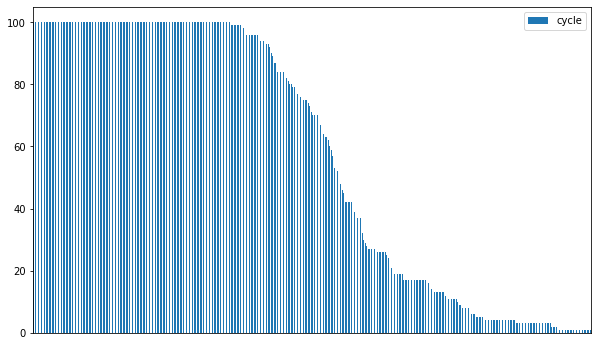

In [0]:
plt.figure(figsize=(10,10))
df_train_raw.cycle.value_counts().to_frame().plot(kind='bar',figsize=(10,6))
plt.xticks([])
plt.show()

In [0]:
# 테스트 데이터
df_test_raw = pd.read_csv('PM_test.txt', sep = ' ', header=None)
df_test_raw.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [0]:
# 26, 26 열 삭제
df_test_raw.drop([26,27], axis=1, inplace=True)
df_test_raw.columns = col_names
df_test_raw.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [0]:
df_test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
id          13096 non-null int64
cycle       13096 non-null int64
setting1    13096 non-null float64
setting2    13096 non-null float64
setting3    13096 non-null float64
s1          13096 non-null float64
s2          13096 non-null float64
s3          13096 non-null float64
s4          13096 non-null float64
s5          13096 non-null float64
s6          13096 non-null float64
s7          13096 non-null float64
s8          13096 non-null float64
s9          13096 non-null float64
s10         13096 non-null float64
s11         13096 non-null float64
s12         13096 non-null float64
s13         13096 non-null float64
s14         13096 non-null float64
s15         13096 non-null float64
s16         13096 non-null float64
s17         13096 non-null int64
s18         13096 non-null int64
s19         13096 non-null float64
s20         13096 non-null float64
s21         13096 non-nu

- 100개의 엔진이 있고 사이클 값은 1 ~ 303이다. 단, 여기서는 고장 시점을 알려주는 것은 아니다.
- 실제 고장 시점까진의 사이클 시간, remaining cycles before failure (time to failure, TTF)는 별도의 정답 파일에 들어 있다.

### Load Truth Data:

In [0]:
# 정답 파일 읽기
df_truth = pd.read_csv('PM_truth.txt', sep = ' ', header=None)
df_truth.head()

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [0]:
# 불필요한 두번 째 컬럼 삭제, 컬럼 이름을 ttf로
df_truth.drop([1], axis=1, inplace=True)
df_truth.columns = ['ttf']
df_truth.head()

,ttf
0,112
1,98
2,69
3,82
4,91


In [0]:
df_truth.describe()

,ttf
count,100.00000
mean,75.52000
std,41.76497
min,7.00000
25%,32.75000
50%,86.00000
75%,112.25000
max,145.00000


In [0]:
# df_truth.ttf.value_counts().to_frame().plot(kind='bar')

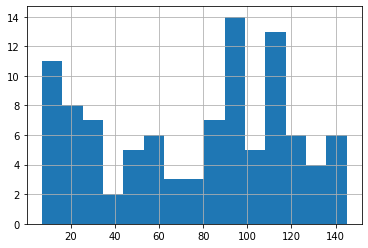

In [0]:
df_truth.ttf.hist(bins=15)

## 검증을 위해서, 테스트 데이터에 레이블 값을 컬럼에 추가하는 것이 필요하다.
## 추가 특성으로 이동평균값과 이동 표준편차를 추가한다.


### Feature Extraction 함수 정의

In [0]:
def add_features(df_in, rolling_win_size):
    
    """Add rolling average and rolling standard deviation for sensors readings using fixed rolling window size.
    
    Args:
            df_in (dataframe)     : The input dataframe to be proccessed (training or test) 
            rolling_win_size (int): The window size, number of cycles for applying the rolling function
        
    Reurns:
            dataframe: contains the input dataframe with additional rolling mean and std for each sensor
    
    """
    
    sensor_cols = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
    
    sensor_av_cols = [nm.replace('s', 'av') for nm in sensor_cols]
    sensor_sd_cols = [nm.replace('s', 'sd') for nm in sensor_cols]
    
    df_out = pd.DataFrame()
    
    ws = rolling_win_size
        
    for m_id in pd.unique(df_in.id):
    
        # get a subset for each engine sensors
        df_engine = df_in[df_in['id'] == m_id]
        df_sub = df_engine[sensor_cols]

        # get rolling mean for the subset
        av = df_sub.rolling(ws, min_periods=1).mean()
        av.columns = sensor_av_cols
    
        # get the rolling standard deviation for the subset
        sd = df_sub.rolling(ws, min_periods=1).std().fillna(0)
        sd.columns = sensor_sd_cols
    
        # combine the two new subset dataframes columns to the engine subset
        new_ftrs = pd.concat([df_engine,av,sd], axis=1)
    
        # add the new features rows to the output dataframe
        df_out = pd.concat([df_out,new_ftrs])
        
    return df_out

## 훈련 데이터를 수정하여 회귀와 분류에 필요한 레이블을 컬럼에 추가한다

In [0]:
def prepare_train_data (df_in, period):
    
    """Add regression and classification labels to the training data.

        Regression label: ttf (time-to-failure) = each cycle# for an engine subtracted from the last cycle# of the same engine
        Binary classification label: label_bnc = if ttf is <= parameter period then 1 else 0 (values = 0,1)
        Multi-class classification label: label_mcc = 2 if ttf <= 0.5* parameter period , 1 if ttf<= parameter period, else 2
        
      Args:
          df_in (dataframe): The input training data
          period (int)     : The number of cycles for TTF segmentation. Used to derive classification labels
          
      Returns:
          dataframe: The input dataframe with regression and classification labels added
          
    """
    
    # 회귀용 레이블 생성
    
    # 각 엔진에 대해서 마지막 사이클 값을 저장하는 데이터 프레임 생성
    df_max_cycle = pd.DataFrame(df_in.groupby('id')['cycle'].max())
    df_max_cycle.reset_index(level=0, inplace=True)
    df_max_cycle.columns = ['id', 'last_cycle']
    
    # time-to-failure ttf 을 새로운 컬러에 기록 (회귀 레이블)
    df_in = pd.merge(df_in, df_max_cycle, on='id')
    df_in['ttf'] = df_in['last_cycle'] - df_in['cycle']
    df_in.drop(['last_cycle'], axis=1, inplace=True)
    
    # 이진 분류 레이블 작성
    df_in['label_bnc'] = df_in['ttf'].apply(lambda x: 1 if x <= period else 0)
    
    # 다중 분류 레이블 작성
    df_in['label_mcc'] = df_in['ttf'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)
    
    return df_in
    

테스트 데이터에 대해서 회귀레이블과 분류 데이블을 추가

In [0]:
def prepare_test_data(df_test_in, df_truth_in, period):
    
    """Add regression and classification labels to the test data.

        Regression label: ttf (time-to-failure) = extract the last cycle for each enginge and then merge the record with the truth data
        Binary classification label: label_bnc = if ttf is <= parameter period then 1 else 0 (values = 0,1)
        Multi-class classification label: label_mcc = 2 if ttf <= 0.5* parameter period , 1 if ttf<= parameter period, else 2
        
      Args:
          df_in (dataframe): The input training data
          period (int)     : The number of cycles for TTF segmentation. Used to derive classification labels
          
      Returns:
          dataframe: The input dataframe with regression and classification labels added
    

    
    """
    
    df_tst_last_cycle = pd.DataFrame(df_test_in.groupby('id')['cycle'].max())
    
    df_tst_last_cycle.reset_index(level=0, inplace=True)
    df_tst_last_cycle.columns = ['id', 'last_cycle']
    
    df_test_in = pd.merge(df_test_in, df_tst_last_cycle, on='id')


    df_test_in = df_test_in[df_test_in['cycle'] == df_test_in['last_cycle']]

    df_test_in.drop(['last_cycle'], axis=1, inplace=True)
    
    df_test_in.reset_index(drop=True, inplace=True)
    
    df_test_in = pd.concat([df_test_in, df_truth], axis=1)
    
    #create binary classification label
    df_test_in['label_bnc'] = df_test_in['ttf'].apply(lambda x: 1 if x <= period else 0)
    
    #create multi-class classification label
    df_test_in['label_mcc'] = df_test_in['ttf'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)

    return df_test_in

## 훈련과 테스트 데이터에 대해서 위의 함수를 사용하여 레이블을 추가한다.

### Prepare the Training Data:

In [0]:
# 윈도우 크기를 5로 지정함
df_train_fx = add_features(df_train_raw, 5)
df_train_fx.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10,av11,av12,av13,av14,av15,av16,av17,av18,av19,av20,av21,sd1,sd2,sd3,sd4,sd5,sd6,sd7,sd8,sd9,sd10,sd11,sd12,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,518.67,641.820000,1589.700000,1400.600000,14.62,21.61,554.360000,2388.0600,9046.190000,1.3,47.470,521.660,2388.020,8138.620000,8.419500,0.03,392.000000,2388.0,100.0,39.060000,23.419000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,518.67,641.985000,1590.760000,1401.870000,14.62,21.61,554.055000,2388.0500,9045.130000,1.3,47.480,521.970,2388.045,8135.055000,8.425650,0.03,392.000000,2388.0,100.0,39.030000,23.421300,0.0,0.233345,1.499066,1.796051,0.0,0.0,0.431335,0.014142,1.499066,0.0,0.014142,0.438406,0.035355,5.041671,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,518.67,642.106667,1589.836667,1402.646667,14.62,21.61,554.123333,2388.0600,9047.733333,1.3,47.410,522.120,2388.040,8134.446667,8.423033,0.03,391.333333,2388.0,100.0,39.003333,23.395600,0.0,0.267644,1.918654,1.850009,0.0,0.0,0.327159,0.020000,4.632023,0.0,0.121655,0.404475,0.026458,3.717450,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,518.67,642.167500,1588.075000,1402.452500,14.62,21.61,554.205000,2388.0725,9048.170000,1.3,47.340,522.305,2388.050,8134.292500,8.409325,0.03,391.500000,2388.0,100.0,38.972500,23.390175,0.0,0.250117,3.855909,1.559645,0.0,0.0,0.313103,0.029861,3.881555,0.0,0.171659,0.495950,0.029439,3.050906,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,518.67,642.208000,1587.030000,1403.206000,14.62,21.61,554.164000,2388.0700,9049.566000,1.3,47.328,522.282,2388.048,8134.194000,8.413340,0.03,391.800000,2388.0,100.0,38.958000,23.393020,0.0,0.234776,4.075678,2.159440,0.0,0.0,0.286234,0.026458,4.587366,0.0,0.151063,0.432574,0.025884,2.651326,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498


## 분류를 수행하기 위해서 30 사이클을 기준으로 고장시점 예측
- 이진 분류: 30 사이클 이내에 고장 여부
- 다중 분류: 30 사이클 이내 및 15 사이클 이내 고장 여부


In [0]:
df_train = prepare_train_data (df_train_fx, 30)
df_train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10,av11,av12,av13,av14,av15,av16,av17,av18,av19,av20,av21,sd1,sd2,sd3,sd4,sd5,sd6,sd7,sd8,sd9,sd10,sd11,sd12,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,518.67,641.820000,1589.700000,1400.600000,14.62,21.61,554.360000,2388.0600,9046.190000,1.3,47.470,521.660,2388.020,8138.620000,8.419500,0.03,392.000000,2388.0,100.0,39.060000,23.419000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,518.67,641.985000,1590.760000,1401.870000,14.62,21.61,554.055000,2388.0500,9045.130000,1.3,47.480,521.970,2388.045,8135.055000,8.425650,0.03,392.000000,2388.0,100.0,39.030000,23.421300,0.0,0.233345,1.499066,1.796051,0.0,0.0,0.431335,0.014142,1.499066,0.0,0.014142,0.438406,0.035355,5.041671,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,518.67,642.106667,1589.836667,1402.646667,14.62,21.61,554.123333,2388.0600,9047.733333,1.3,47.410,522.120,2388.040,8134.446667,8.423033,0.03,391.333333,2388.0,100.0,39.003333,23.395600,0.0,0.267644,1.918654,1.850009,0.0,0.0,0.327159,0.020000,4.632023,0.0,0.121655,0.404475,0.026458,3.717450,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,518.67,642.167500,1588.075000,1402.452500,14.62,21.61,554.205000,2388.0725,9048.170000,1.3,47.340,522.305,2388.050,8134.292500,8.409325,0.03,391.500000,2388.0,100.0,38.972500,23.390175,0.0,0.250117,3.855909,1.559645,0.0,0.0,0.313103,0.029861,3.881555,0.0,0.171659,0.495950,0.029439,3.050906,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,518.67,642.208000,1587.030000,1403.206000,14.62,21.61,554.164000,2388.0700,9049.566000,1.3,47.328,522.282,2388.048,8134.194000,8.413340,0.03,391.800000,2388.0,100.0,38.958000,23.393020,0.0,0.234776,4.075678,2.159440,0.0,0.0,0.286234,0.026458,4.587366,0.0,0.151063,0.432574,0.025884,2.651326,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0,0


In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20631 entries, 0 to 20630
Data columns (total 71 columns):
id           20631 non-null int64
cycle        20631 non-null int64
setting1     20631 non-null float64
setting2     20631 non-null float64
setting3     20631 non-null float64
s1           20631 non-null float64
s2           20631 non-null float64
s3           20631 non-null float64
s4           20631 non-null float64
s5           20631 non-null float64
s6           20631 non-null float64
s7           20631 non-null float64
s8           20631 non-null float64
s9           20631 non-null float64
s10          20631 non-null float64
s11          20631 non-null float64
s12          20631 non-null float64
s13          20631 non-null float64
s14          20631 non-null float64
s15          20631 non-null float64
s16          20631 non-null float64
s17          20631 non-null int64
s18          20631 non-null int64
s19          20631 non-null float64
s20          20631 non-null float64

## 전처리된 데이터를 파일로 저장
### 나중을 위하여 자신이 구글 드라이브에 저장

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df_train.to_csv('/content/drive/My Drive/PM_train.csv', index=False)

### Prepare the Test Data:

In [0]:
# 같은 작업을 테스트 데이터에 대해서 수행
df_test_fx = add_features(df_test_raw, 5)
df_test_fx.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10,av11,av12,av13,av14,av15,av16,av17,av18,av19,av20,av21,sd1,sd2,sd3,sd4,sd5,sd6,sd7,sd8,sd9,sd10,sd11,sd12,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,518.67,643.020000,1585.290000,1398.210000,14.62,21.61,553.900000,2388.040000,9050.170,1.3,47.200,521.7200,2388.0300,8125.550000,8.405200,0.03,392.000000,2388.0,100.0,38.860000,23.37350,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,518.67,642.365000,1586.870000,1396.815000,14.62,21.61,554.375000,2388.025000,9052.295,1.3,47.350,521.9400,2388.0450,8132.585000,8.392750,0.03,392.500000,2388.0,100.0,38.940000,23.38255,0.0,0.926310,2.234457,1.972828,0.0,0.0,0.671751,0.021213,3.005204,0.0,0.212132,0.311127,0.021213,9.948992,0.017607,0.0,0.707107,0.0,0.0,0.113137,0.012799
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,518.67,642.396667,1586.893333,1398.323333,14.62,21.61,554.286667,2388.033333,9053.850,1.3,47.400,521.9500,2388.0400,8131.756667,8.409867,0.03,392.666667,2388.0,100.0,38.986667,23.39390,0.0,0.657292,1.580517,2.961627,0.0,0.0,0.499032,0.020817,3.430700,0.0,0.173205,0.220681,0.017321,7.179807,0.032155,0.0,0.577350,0.0,0.0,0.113725,0.021642
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,518.67,642.407500,1586.200000,1400.347500,14.62,21.61,554.232500,2388.032500,9051.710,1.3,47.370,521.8075,2388.0425,8132.042500,8.405325,0.03,392.250000,2388.0,100.0,38.990000,23.38885,0.0,0.537114,1.894254,4.715558,0.0,0.0,0.421614,0.017078,5.115160,0.0,0.153623,0.337182,0.015000,5.890096,0.027781,0.0,0.957427,0.0,0.0,0.093095,0.020353
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,518.67,642.428000,1586.398000,1400.662000,14.62,21.61,554.218000,2388.028000,9050.278,1.3,47.358,521.8760,2388.0400,8131.542000,8.404880,0.03,391.800000,2388.0,100.0,38.990000,23.39368,0.0,0.467408,1.699167,4.143902,0.0,0.0,0.366565,0.017889,5.465965,0.0,0.135720,0.329742,0.014142,5.222300,0.024080,0.0,1.303840,0.0,0.0,0.080623,0.020672


In [0]:
# 분류를 위한 레이블 추가, 고장 시점은 'ttf' 컬럼에 저장

df_test = prepare_test_data(df_test_fx, df_truth, 30)
df_test.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10,av11,av12,av13,av14,av15,av16,av17,av18,av19,av20,av21,sd1,sd2,sd3,sd4,sd5,sd6,sd7,sd8,sd9,sd10,sd11,sd12,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,21.61,554.42,2388.08,9056.40,1.3,47.23,521.79,2388.06,8130.11,8.4024,0.03,393,2388,100.0,38.81,23.3552,518.67,642.266,1586.998,1399.918,14.62,21.61,554.116,2388.082,9050.324,1.3,47.288,521.924,2388.064,8132.032,8.42620,0.03,392.0,2388.0,100.0,38.924,23.37350,0.0,0.393865,4.683863,1.362689,0.0,0.0,0.338275,0.008367,5.200801,0.0,0.152217,0.261591,0.028810,3.302941,0.021174,0.0,0.707107,0.0,0.0,0.124016,0.025037,112,0,0
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,21.61,553.52,2388.10,9044.77,1.3,47.67,521.74,2388.09,8126.90,8.4505,0.03,391,2388,100.0,38.81,23.2618,518.67,642.672,1588.342,1406.778,14.62,21.61,553.748,2388.108,9047.032,1.3,47.506,521.596,2388.102,8127.672,8.44226,0.03,392.2,2388.0,100.0,38.902,23.27434,0.0,0.167839,1.559670,4.535578,0.0,0.0,0.357729,0.044385,3.044901,0.0,0.098387,0.450255,0.008367,1.370062,0.011429,0.0,1.095445,0.0,0.0,0.069785,0.027820,98,0,0
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,21.61,552.59,2388.16,9049.26,1.3,47.88,520.83,2388.14,8131.46,8.4119,0.03,395,2388,100.0,38.93,23.2740,518.67,642.874,1592.640,1413.350,14.62,21.61,552.702,2388.166,9047.406,1.3,47.706,520.722,2388.174,8129.666,8.45868,0.03,394.2,2388.0,100.0,38.686,23.24412,0.0,0.287367,4.205152,3.357976,0.0,0.0,0.292609,0.028810,1.608782,0.0,0.111937,0.418234,0.029665,2.979090,0.030924,0.0,0.836660,0.0,0.0,0.143631,0.018966,69,0,0
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,21.61,552.64,2388.13,9051.30,1.3,47.65,521.88,2388.11,8133.64,8.4634,0.03,395,2388,100.0,38.58,23.2581,518.67,642.786,1591.918,1410.736,14.62,21.61,553.444,2388.116,9054.800,1.3,47.642,521.434,2388.114,8134.328,8.45182,0.03,393.6,2388.0,100.0,38.758,23.25156,0.0,0.106442,2.818611,5.282105,0.0,0.0,0.590999,0.058138,4.536805,0.0,0.046583,0.363291,0.027019,0.622953,0.021249,0.0,1.341641,0.0,0.0,0.126372,0.021106,82,0,0
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,21.61,553.29,2388.10,9053.99,1.3,47.46,521.00,2388.15,8125.74,8.4362,0.03,394,2388,100.0,38.75,23.4117,518.67,642.702,1591.568,1411.796,14.62,21.61,553.158,2388.122,9053.330,1.3,47.536,521.062,2388.134,8128.798,8.43662,0.03,393.4,2388.0,100.0,38.810,23.29114,0.0,0.259557,1.496620,5.309739,0.0,0.0,0.454170,0.038987,3.212717,0.0,0.159154,0.260231,0.023022,1.923609,0.009627,0.0,0.547723,0.0,0.0,0.091924,0.101100,91,0,0


In [0]:
df_test.dtypes

id             int64
cycle          int64
setting1     float64
setting2     float64
setting3     float64
              ...   
sd20         float64
sd21         float64
ttf            int64
label_bnc      int64
label_mcc      int64
Length: 71, dtype: object

In [0]:
df_test.to_csv('/content/drive/My Drive/PM_test.csv', index=False)